In [1]:
import pandas as pd
import numpy as np
import wfdb
import ast
import random
import matplotlib.pyplot as plt
import os
import sys
sys.path.append("./adjusted library")  # in order to import the adjusted "ecg_plot" library
import ecg_plot_v2

## Convert dataset to image dataset

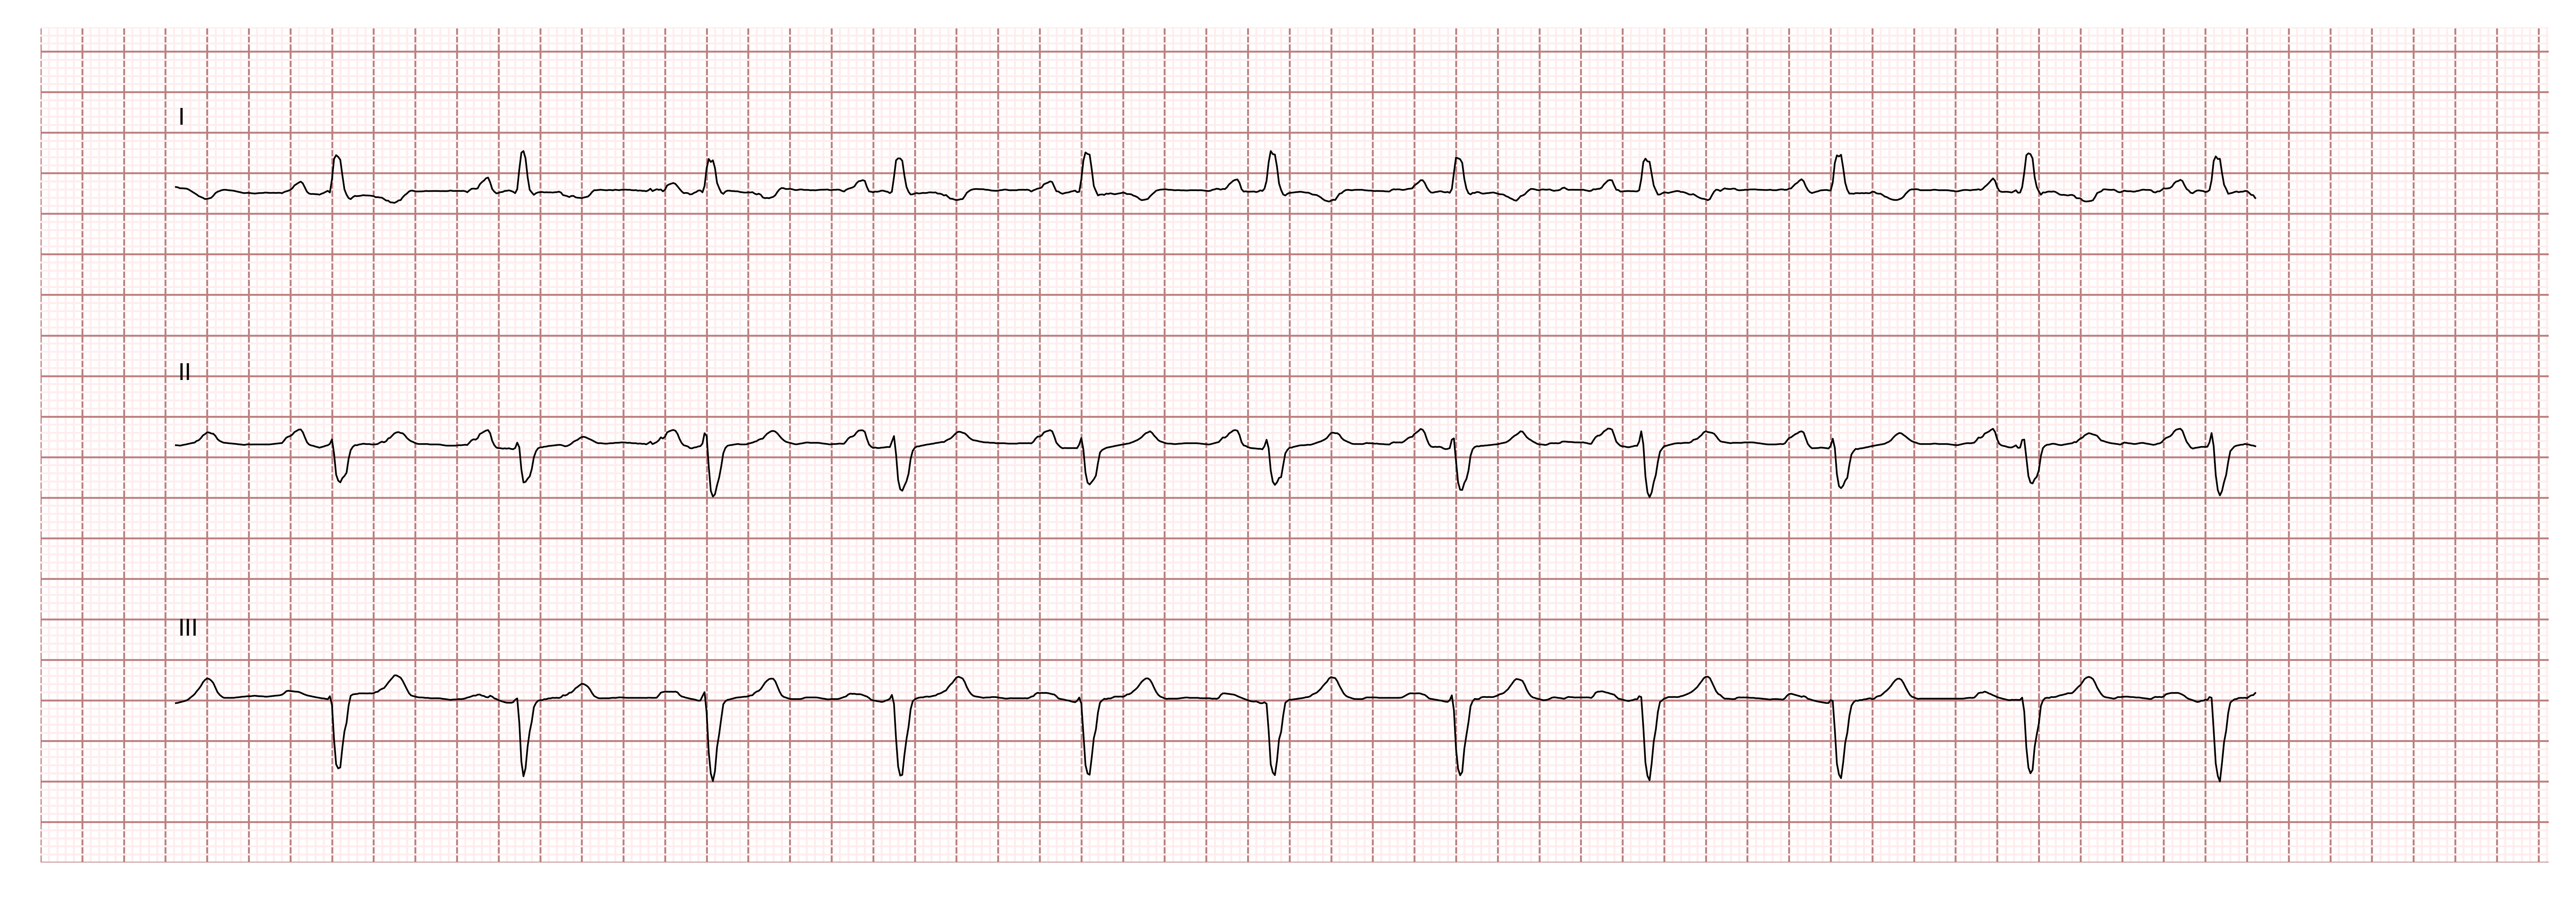

In [5]:
n_sample_each_lead = 1       # number of images with same lead format; if n_sample_each_lead == 500, first 500 signals will be printed as 3by1 lead format, the next 500 signals will be printed as 3by4 format
sampling_rate = 100
X = np.load(f'../../signal_dataset/all_signals_{sampling_rate}Hz.npy')
row_height = 6.265
lead_index = ['I', 'II', 'III', 'aVL', 'aVR', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']  # order of the leads in the dataset
lead_display = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'] # order of the lead that I want to be shown
lead_config = {'3by1': {'n_column':1, 'length': 1000, 'lead_order': list(range(3)), 'full_ecg_name': None, 'n_leads': 3}, 
               '3by4': {'n_column':4, 'length': 250, 'lead_order': list(range(12)), 'full_ecg_name': 'II', 'n_leads': 12},
               '12by1':  {'n_column':1, 'length': 1000, 'lead_order': list(range(12)), 'full_ecg_name': None, 'n_leads': 12}, 
               '6by2': {'n_column':2, 'length': 500, 'lead_order': list(range(12)), 'full_ecg_name': 'II', 'n_leads': 12}, 
               }  # key determines lead format, value determines some variable passing to ecg_plot_vs.plot
cnt = 0
for lead_format, each_lead_config in lead_config.items():
    for i in random.sample(range(1, 21799), n_sample_each_lead):
        ecg_plot_v2.plot(ecg=X[i, :each_lead_config['length'], :].T, full_ecg=X[i, :, 1].T, 
                         full_ecg_name=each_lead_config['full_ecg_name'], sample_rate=100, 
                         columns=each_lead_config['n_column'], lead_index=lead_index, title='', 
                         lead_order=each_lead_config['lead_order'], show_lead_name=True, show_grid=True, 
                         show_separate_line=True, row_height=6.3, style=None)

        ecg_plot_v2.show()
        # ecg_plot_v2.save_as_jpg(str(i)+'_'+lead_format, path='../../image_dataset_v3.0/', dpi=100)
    cnt += n_sample_each_lead
    break 